In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.manifold import TSNE
import umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_combined_ft_z = pd.read_csv(os.path.join(folder_path, "features_combined_ft_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_combined_ft_mm = pd.read_csv(os.path.join(folder_path, "features_combined_ft_minmax.csv"))

#se quitan las columnas 'filename' y 'label'
df_combined_ft_mm_cl= df_combined_ft_mm.drop(columns=['filename', 'label'])
df_combined_ft_z_cl= df_combined_ft_z.drop(columns=['filename', 'label'])

In [4]:
bandwidth_estimate = estimate_bandwidth(df_combined_ft_z_cl.values, quantile=0.2)
print("Estimated bandwidth:", bandwidth_estimate)

Estimated bandwidth: 2.368321180538561


In [52]:
bandwidth_values = [2.368, 2.5, 3.5, 4.2]

for bw in bandwidth_values:
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    ms.fit(df_combined_ft_z_cl.values)
    labels = ms.labels_
    n_clusters = len(np.unique(labels))
    
    if n_clusters > 1:  # Solo tiene sentido calcular Silhouette si hay más de 1 clúster
        score = silhouette_score(df_combined_ft_z_cl.values, labels)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 2.37 | Clusters: 5 | Silhouette Score: 0.376
Bandwidth: 2.50 | Clusters: 3 | Silhouette Score: 0.502
Bandwidth: 3.50 | Clusters: 2 | Silhouette Score: 0.570
Bandwidth: 4.20 | Clusters: 2 | Silhouette Score: 0.526


In [53]:
bandwidth = 4.2  #bandwidth_estimate
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_combined_ft_z_cl.values)
labels = ms.labels_
n_clusters = len(np.unique(labels))
print(f"Clusters: {n_clusters}")

Clusters: 2


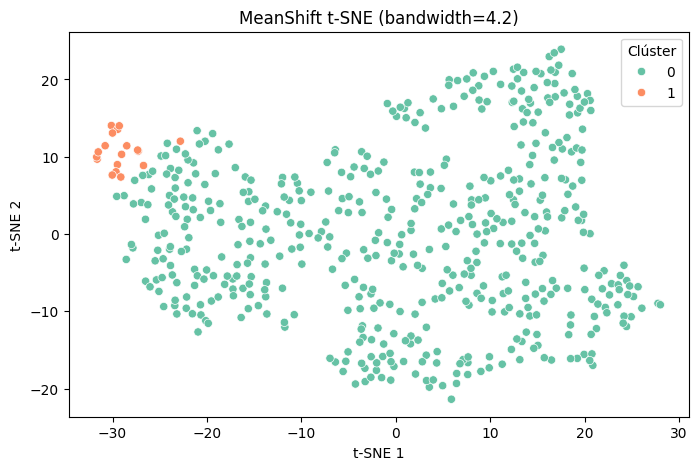

In [54]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_combined_ft_z_cl.values)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='Set2')
plt.title(f'MeanShift t-SNE (bandwidth={bandwidth})')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Clúster')
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


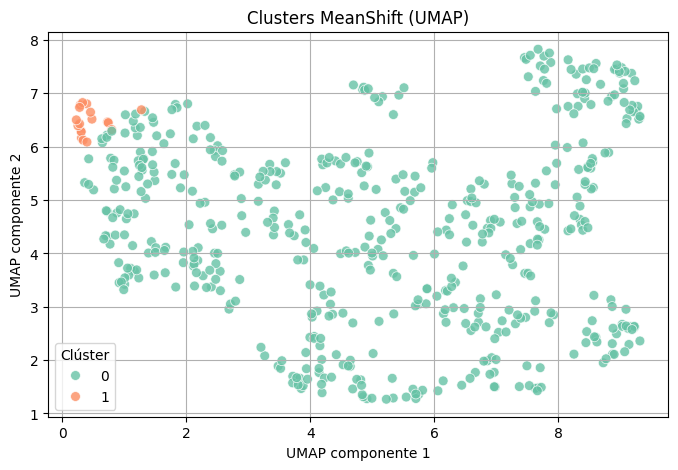

In [55]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
X_umap_z = reducer.fit_transform(df_combined_ft_z_cl)

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_umap_z[:, 0],
    y=X_umap_z[:, 1],
    hue=labels,        
    palette='Set2',
    s=50,
    alpha=0.8
)
plt.title('Clusters MeanShift (UMAP)')
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

In [56]:
score_z = silhouette_score(df_combined_ft_z_cl, labels)
print(f"Silhouette Score: {score_z:.3f}")

Silhouette Score: 0.526


In [57]:
# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({
    'filename': df_combined_ft_z['filename'],
    'label': df_combined_ft_z['label'],
    'cluster': labels
})

# Tabla de contingencia: comparación entre etiquetas originales y clústeres
tabla_contingencia = pd.crosstab(df_resultado['label'], df_resultado['cluster'])
print("Tabla de contingencia entre etiquetas originales y clústeres:")
print(tabla_contingencia)



Tabla de contingencia entre etiquetas originales y clústeres:
cluster    0   1
label           
higher   268   0
smaller  251  18


ni con 2 ni con más cluster sale equilibrado

se hace lo mismo con normalizacion min-max:

In [70]:
bandwidth_estimate_mm = estimate_bandwidth(df_combined_ft_mm_cl.values, quantile=0.2)
print("Estimated bandwidth:", bandwidth_estimate_mm)

Estimated bandwidth: 0.34137947535417107


In [71]:
bandwidth_values = [0.34, 0.5]

for bw in bandwidth_values:
    ms_mm = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_mm.fit(df_combined_ft_mm_cl.values)
    labels_mm = ms_mm.labels_
    n_clusters_mm = len(np.unique(labels_mm))
    
    if n_clusters_mm > 1:
        score = silhouette_score(df_combined_ft_mm_cl.values, labels_mm)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 0.34 | Clusters: 6 | Silhouette Score: 0.180
Bandwidth: 0.50 | Clusters: 2 | Silhouette Score: 0.487


In [ ]:
bandwidth = 0.5
meanshift_mm = MeanShift(bandwidth=bandwidth)
meanshift_mm.fit(df_combined_ft_mm_cl.values)
labels_mm = meanshift_mm.labels_

MeanShift(bandwidth=0.5)

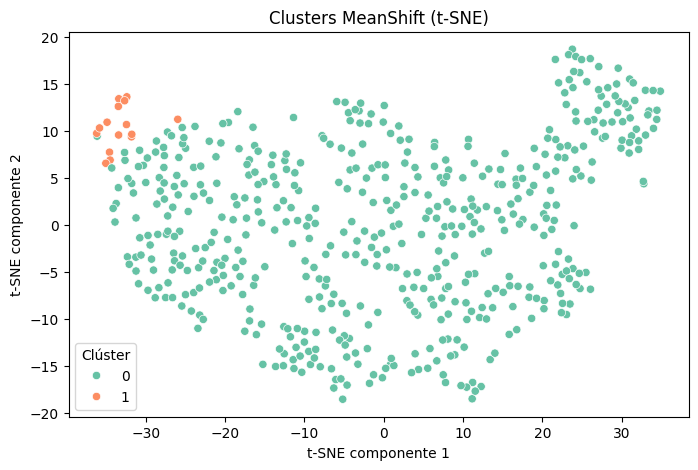

In [73]:
tsne_mm = TSNE(n_components=2, random_state=42)
X_tsne_mm = tsne_mm.fit_transform(df_combined_ft_mm_cl.values)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne_mm[:, 0], y=X_tsne_mm[:, 1], hue=labels_mm, palette='Set2')
plt.title('Clusters MeanShift (t-SNE)')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({
    'filename': df_combined_ft_mm['filename'],
    'label': df_combined_ft_mm['label'],
    'cluster': labels_mm
})

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


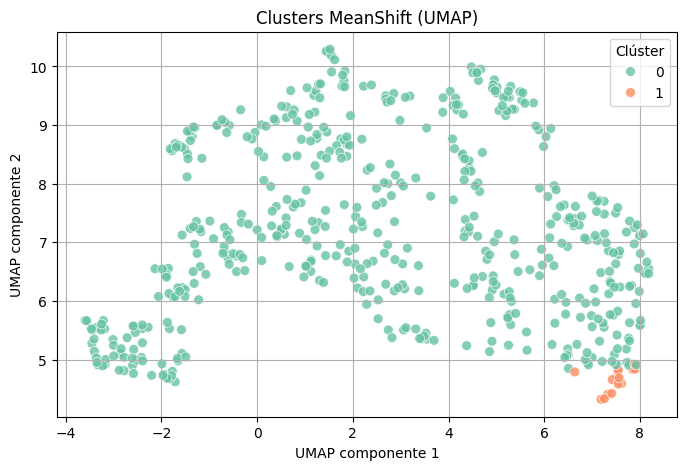

In [75]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
X_umap_mm = reducer.fit_transform(df_combined_ft_mm_cl)


plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_umap_mm[:, 0],
    y=X_umap_mm[:, 1],
    hue=labels_mm,        
    palette='Set2',
    s=50,
    alpha=0.8
)
plt.title('Clusters MeanShift (UMAP)')
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

In [64]:
score_mm = silhouette_score(df_combined_ft_mm_cl, labels)
print(f"Silhouette Score: {score_mm:.3f}")

Silhouette Score: 0.487


In [65]:
tabla_contingencia = pd.crosstab(df_resultado['label'], df_resultado['cluster'])
print(tabla_contingencia)

cluster    0   1
label           
higher   268   0
smaller  254  15


voy a probar hacerle reduccion de dimensionalidad con umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_11276\4185853875.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


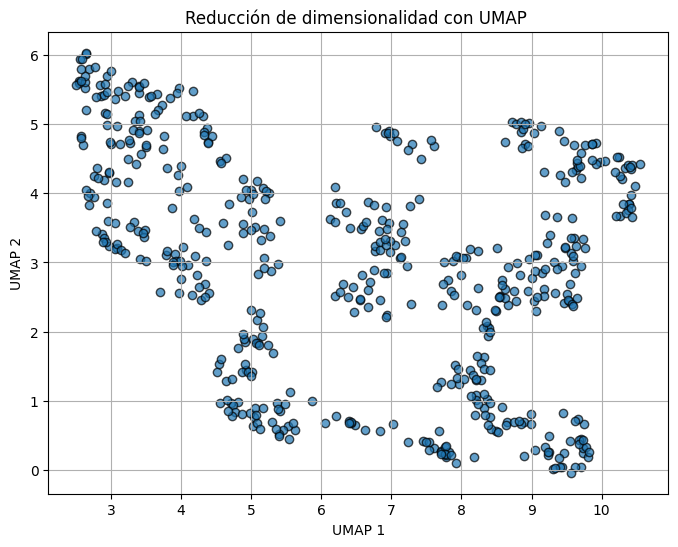

In [ ]:
# Reduccion de la dimensionalidad con UMAP
umap_model_z = umap.UMAP(n_neighbors=11,n_components=6, random_state=42) 
X_umap_z = umap_model_z.fit_transform(df_combined_ft_z_cl)

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [100]:
# Estimación del bandwidth
bandwidth_umap = estimate_bandwidth(X_umap_z, quantile=0.2, n_samples=500)

# Ajuste de MeanShift
ms_umap = MeanShift(bandwidth=bandwidth_umap, bin_seeding=True)
ms_umap.fit(X_umap_z)
labels_umap = ms_umap.labels_  
n_clusters = len(np.unique(labels_umap))

# Contar los elementos en cada clúster
unique, counts = np.unique(labels_umap, return_counts=True)

# Mostrar resultados solo si hay más de un clúster y los clústeres son adecuados
if n_clusters > 1 and all(count > 1 for count in counts):
    score = silhouette_score(X_umap_z, labels_umap)
    print(f"Auto Bandwidth: {bandwidth_umap:.3f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth_umap:.3f} | Clusters: {n_clusters} | Silhouette Score: N/A (clústeres demasiado pequeños)")

Auto Bandwidth: 2.314 | Clusters: 4 | Silhouette Score: 0.407


In [105]:
bandwidth_values_umap = [2.403, 2, 2.5, 2.6, 2.9 ,3, 2.65]

for bw in bandwidth_values_umap:
    ms_umap = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_umap.fit(X_umap_z)
    labels_umap = ms_umap.labels_
    n_clusters = len(np.unique(labels_umap))
    
    if n_clusters > 1:  # 
        score = silhouette_score(X_umap_z, labels_umap)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 2.40 | Clusters: 3 | Silhouette Score: 0.382
Bandwidth: 2.00 | Clusters: 4 | Silhouette Score: 0.408
Bandwidth: 2.50 | Clusters: 3 | Silhouette Score: 0.380
Bandwidth: 2.60 | Clusters: 2 | Silhouette Score: 0.456
Bandwidth: 2.90 | Clusters: 2 | Silhouette Score: 0.436
Bandwidth: 3.00 | Clusters: 2 | Silhouette Score: 0.436
Bandwidth: 2.65 | Clusters: 2 | Silhouette Score: 0.455


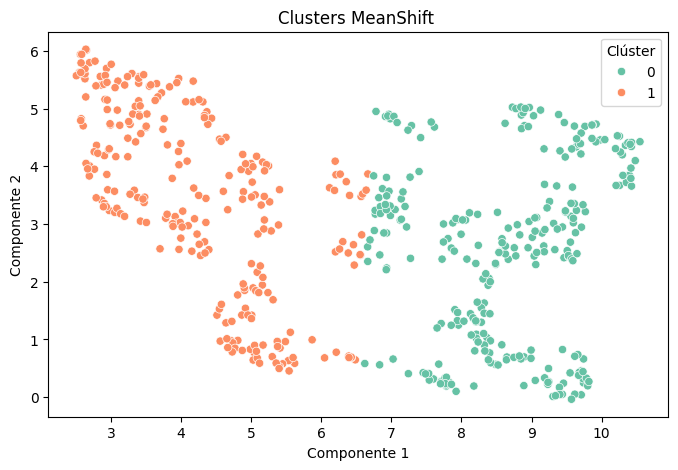

        filename    label  cluster
0    callo_1.png  smaller        1
1   callo_10.png  smaller        0
2  callo_100.png  smaller        1
3  callo_101.png  smaller        1
4  callo_102.png  smaller        1


In [110]:
bandwidth_def = 2.6
meanshift_z = MeanShift(bandwidth=bandwidth_def, bin_seeding=True)
meanshift_z.fit(X_umap_z) 
labels_umap = meanshift_z.labels_  

# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_z[:, 0], y=X_umap_z[:, 1], hue=labels_umap, palette='Set2')
plt.title('Clusters MeanShift ')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({
    'filename': df_combined_ft_z['filename'],
    'label': df_combined_ft_z['label'],
    'cluster': labels_umap  # Usamos las etiquetas generadas en la última ejecución
})

# Mostrar primeras filas
print(df_resultado.head())

In [111]:
# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df_resultado['label'], df_resultado['cluster'])

# Mostrar la tabla
print(tabla_contingencia)


cluster    0    1
label            
higher   235   33
smaller   42  227


min-max con umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_11276\165075445.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


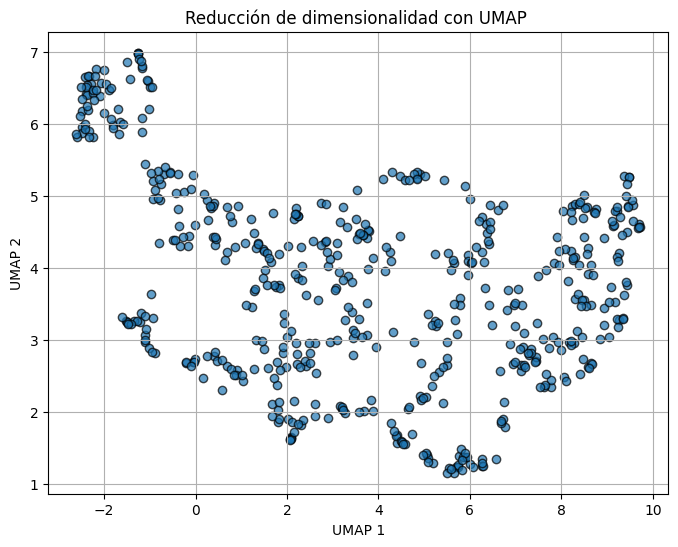

In [123]:
# Reduccion de la dimensionalidad con UMAP
umap_model_mm = umap.UMAP(n_neighbors=9, n_components=5, random_state=42)
X_umap_mm = umap_model_mm.fit_transform(df_combined_ft_mm_cl)

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [126]:
# Estimación del bandwidth
bandwidth_umap_mm = estimate_bandwidth(X_umap_mm, quantile=0.2, n_samples=500)

# Ajuste de MeanShift
ms_umap_mm = MeanShift(bandwidth=bandwidth_umap_mm, bin_seeding=True)
ms_umap_mm.fit(X_umap_mm)
labels_umap_mm = ms_umap_mm.labels_  
n_clusters = len(np.unique(labels_umap_mm))

# Contar los elementos en cada clúster
unique, counts = np.unique(labels_umap_mm, return_counts=True)


if n_clusters > 1 and all(count > 1 for count in counts):
    score = silhouette_score(X_umap_mm, labels_umap_mm)
    print(f"Auto Bandwidth: {bandwidth_umap_mm:.3f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth_umap_mm:.3f} | Clusters: {n_clusters} | Silhouette Score: N/A (clústeres demasiado pequeños)")

Auto Bandwidth: 2.454 | Clusters: 3 | Silhouette Score: 0.471


In [178]:
bandwidth_values_umap_mm = [2.5, 2, 2.3, 2.56, 2.54, 3, 2.78, 2.75, 2.9, 3.1, 3.15, 3.24, 3.3, 3.35,3.36, 3.365]

for bw in bandwidth_values_umap_mm:
    ms_umap_mm = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_umap_mm.fit(X_umap_mm)
    labels_umap_mm = ms_umap_mm.labels_
    n_clusters = len(np.unique(labels_umap_mm))
    
    if n_clusters > 1:  # 
        score = silhouette_score(X_umap_mm, labels_umap_mm)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 2.50 | Clusters: 3 | Silhouette Score: 0.471
Bandwidth: 2.00 | Clusters: 6 | Silhouette Score: 0.424
Bandwidth: 2.30 | Clusters: 5 | Silhouette Score: 0.408
Bandwidth: 2.56 | Clusters: 3 | Silhouette Score: 0.472
Bandwidth: 2.54 | Clusters: 3 | Silhouette Score: 0.472
Bandwidth: 3.00 | Clusters: 3 | Silhouette Score: 0.472
Bandwidth: 2.78 | Clusters: 3 | Silhouette Score: 0.473
Bandwidth: 2.75 | Clusters: 3 | Silhouette Score: 0.473
Bandwidth: 2.90 | Clusters: 3 | Silhouette Score: 0.473
Bandwidth: 3.10 | Clusters: 2 | Silhouette Score: 0.490
Bandwidth: 3.15 | Clusters: 2 | Silhouette Score: 0.497
Bandwidth: 3.24 | Clusters: 2 | Silhouette Score: 0.499
Bandwidth: 3.30 | Clusters: 2 | Silhouette Score: 0.501
Bandwidth: 3.35 | Clusters: 2 | Silhouette Score: 0.510
Bandwidth: 3.36 | Clusters: 2 | Silhouette Score: 0.510
Bandwidth: 3.37 | Clusters: 2 | Silhouette Score: 0.501


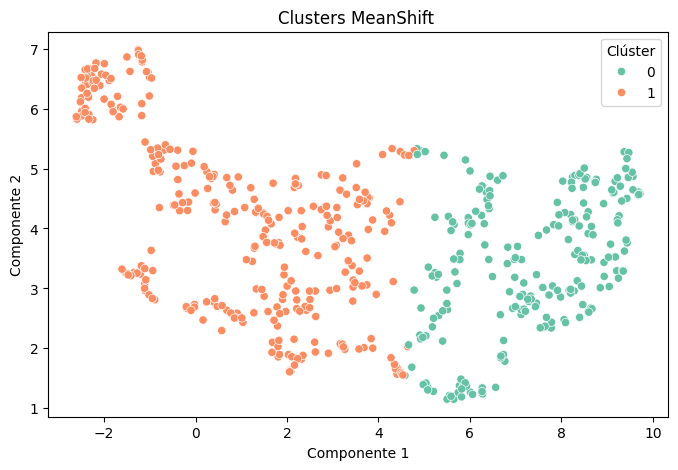

In [173]:
bandwidth_def_mm = 3.35
meanshift_mm = MeanShift(bandwidth=bandwidth_def_mm, bin_seeding=True)
meanshift_mm.fit(X_umap_mm) 
labels_umap_mm = meanshift_mm.labels_  

# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_mm[:, 0], y=X_umap_mm[:, 1], hue=labels_umap_mm, palette='Set2')
plt.title('Clusters MeanShift ')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado_mm_umap = pd.DataFrame({
    'filename': df_combined_ft_mm['filename'],
    'label': df_combined_ft_mm['label'],
    'cluster': labels_umap_mm  
})



In [174]:
tabla_contingencia_mm_umap = pd.crosstab(df_resultado_mm_umap['label'], df_resultado_mm_umap['cluster'])
print(tabla_contingencia_mm_umap)


cluster    0    1
label            
higher    18  250
smaller  210   59
